Sampling randomly from Dirichlet with $\theta_1, \theta_2, \theta_3$

In [1]:
%matplotlib inline

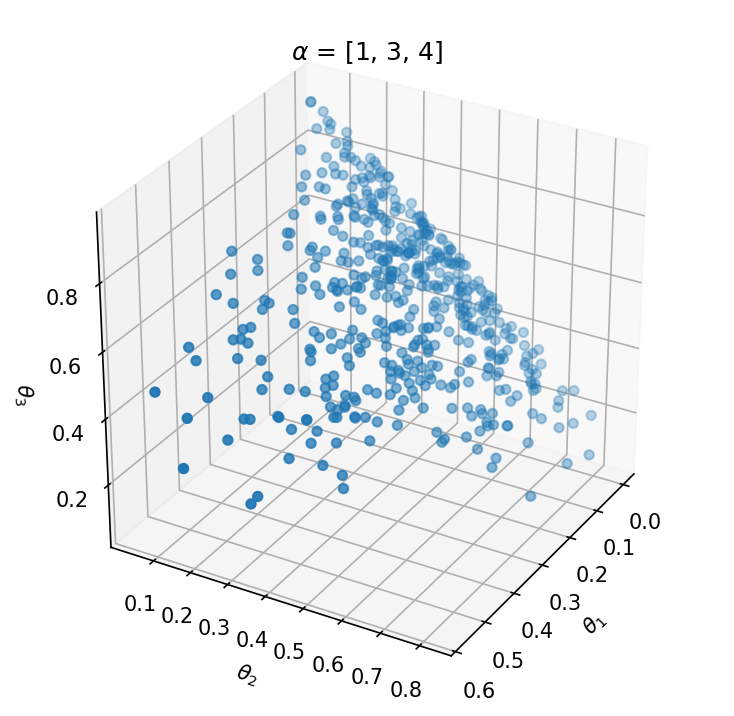

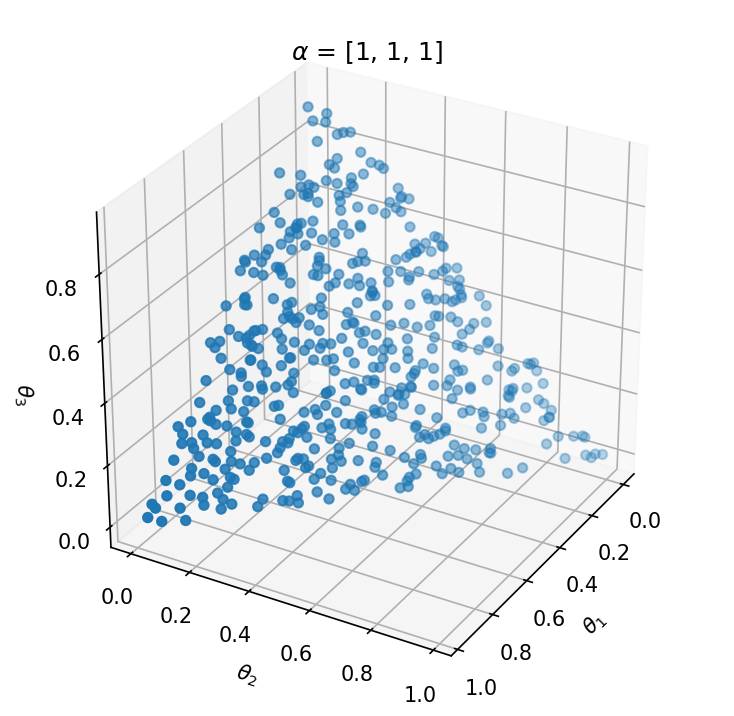

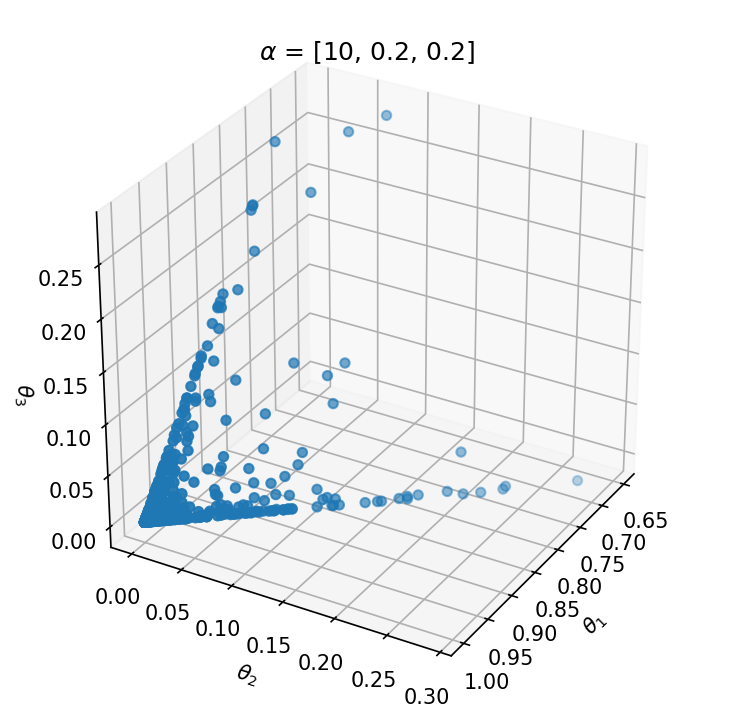

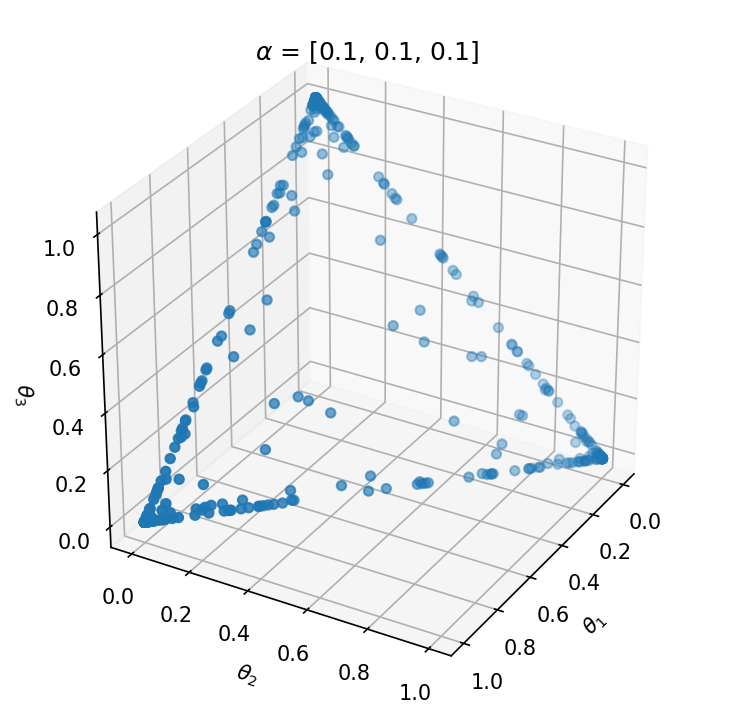

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for alpha in [[1, 3, 4], [1, 1, 1], [10, 0.2, 0.2], [0.1, 0.1, 0.1]]:
    theta = stats.dirichlet(alpha).rvs(500)

    fig = plt.figure(figsize=(6, 6), dpi=150)
    ax = plt.gca(projection='3d')
    plt.title(r'$\alpha$ = {}'.format(alpha))
    ax.scatter(theta[:, 0], theta[:, 1], theta[:, 2])
    ax.view_init(azim=30)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel(r'$\theta_3$')
    plt.show()

The defining property of the DP is that its samples have weights $π_k$ and locations $θ_k$ distributed in such a way that when partitioning $S(H)$ into finitely many arbitrary disjoint subsets $S1,…,Sj J<∞$, the sums of the weights $π_k$ in each of these J subsets are distributed according to a Dirichlet distribution that is parameterized by α and a discrete base distribution (like $G_0$) whose weights are equal to the integrals of the base distribution $H_0$ over the subsets $S_n$.

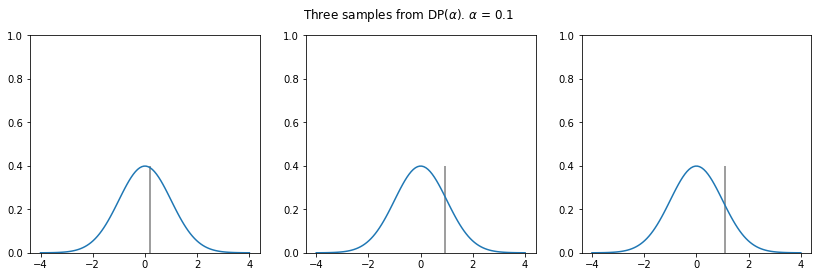

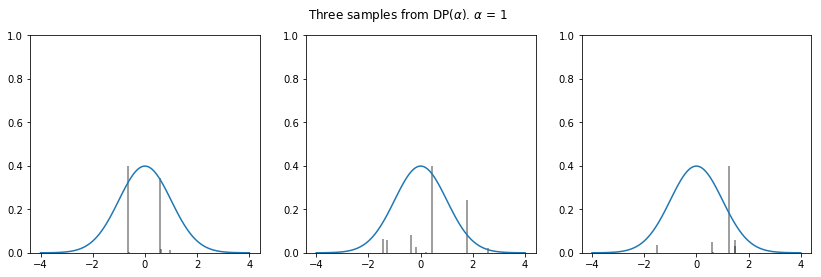

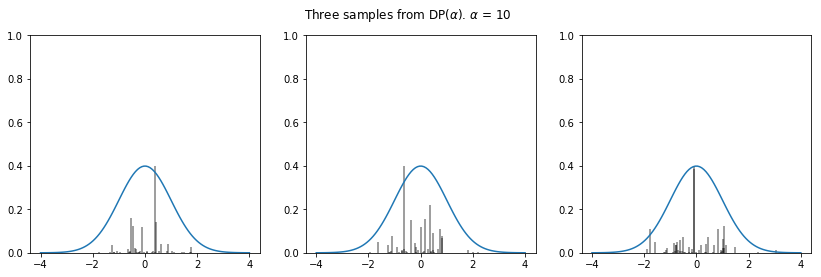

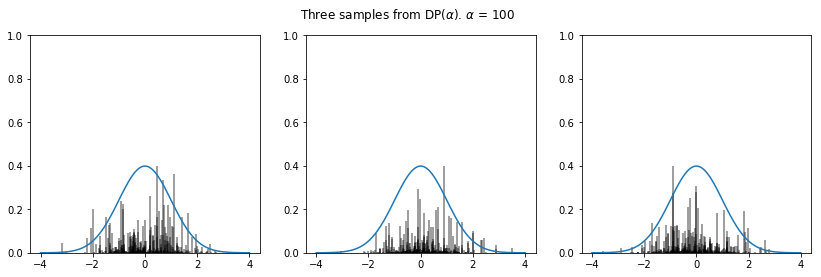

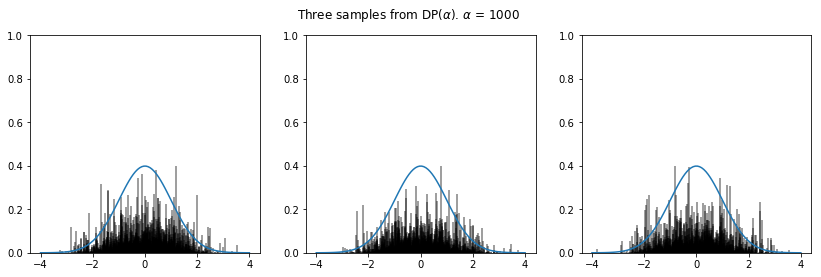

In [6]:
def dirichlet_process(h_0, alpha):
    """
    Truncated dirichlet process.
    :param h_0: (scipy distribution)
    :param alpha: (flt)
    :param n: (int) Truncate value.
    """
    n = max(int(5 * alpha + 2), 500)  # truncate the values. 
    pi = stats.beta(1, alpha).rvs(size=n)
    pi[1:] = pi[1:] * (1 - pi[:-1]).cumprod()  # stick breaking process
    theta = h_0(size=n)  # samples from original distribution
    return pi, theta
        
def plot_normal_dp_approximation(alpha, n=3):
    pi, theta = dirichlet_process(stats.norm.rvs, alpha)
    x = np.linspace(-4, 4, 100)
    
    plt.figure(figsize=(14, 4))
    plt.suptitle(r'Three samples from DP($\alpha$). $\alpha$ = {}'.format(alpha))
    plt.ylabel(r'$\pi$')
    plt.xlabel(r'$\theta$')
    pltcount = int('1' + str(n) + '0')
    
    for i in range(n):
        pltcount += 1
        plt.subplot(pltcount)
        pi, theta = dirichlet_process(stats.norm.rvs, alpha)
        pi = pi * (stats.norm.pdf(0) / pi.max())
        plt.vlines(theta, 0, pi, alpha=0.5)
        plt.ylim(0, 1)
        plt.plot(x, stats.norm.pdf(x))

np.random.seed(65)
for alpha in [.1, 1, 10, 100, 1000]:
    plot_normal_dp_approximation(alpha)

In the above graphs it can be seen for increasing $\alpha$ , we tend to move more closer towards the original distribution $H_0$ which is a Gaussian. 